# test notebook to read data from h5

In [1]:
import os
import sys
import numpy as np
import scipy as sp
import pandas as pd         # pandas tabular DataFrame for task/behavioral data
import matplotlib as mpl    # plot
import matplotlib.pyplot as plt
import re                   # regular expression
import time                 # time code execution
import pickle
import warnings
import h5py

import dg2df                # for DLSH dynamic group (behavioral data)
import neo                  # data structure for neural data
import quantities as pq
import signal_align         # in this package: align neural data according to task
import PyNeuroAna as pna    # in this package: analysis
import PyNeuroPlot as pnp   # in this package: plot
import misc_tools           # in this package: misc

import data_load_DLSH       # package specific for DLSH lab data


/shared/homes/sguan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
class DataNeural(dict):
    def __init__(self, data_dict):
        for (key, value) in data_dict.items():
            self[key] = value
#temp0=DataNeural(temp)

signal_info_detail = pd.read_pickle('/shared/homes/sguan/Coding_Projects/support_data/spike_wf_info_Dante.pkl')
def set_signal_id(signal_info):
    signal_info['signal_id'] = signal_info['date'].apply(lambda x: '{:0>6}'.format(x)).str.cat(
        [signal_info['channel_index'].apply(lambda x: '{:0>2}'.format(x)),
        signal_info['sort_code'].apply(lambda x: '{:0>1}'.format(x))],
        sep='_'
        )
    return signal_info
signal_info_detail = set_signal_id(signal_info_detail)


dir_data_save = '/shared/homes/sguan/Coding_Projects/support_data'
block_type = 'srv_mask'   # one of ['srv_mask', 'matchnot']
signal_type = 'spk'

hdf_file_path = '{}/all_data_thor_{}.hdf5'.format(dir_data_save, 'srv_mask')
hf_srv_mask = h5py.File(hdf_file_path, 'r')

# hdf_file_path = '{}/all_data_dante_{}.hdf5'.format(dir_data_save, 'matchnot')
# hf_matchnot = h5py.File(hdf_file_path, 'r')


In [3]:
list_psth_srv_mask = []
list_signal_srv_mask = []
list_psth_matchnot = []
list_signal_matchnot = []
list_data_neuro = []
for date in list(hf_srv_mask.keys()):
    print(date, 'reading_dg, srv_mask')
    data_df_srv_mask = pd.read_json(hf_srv_mask[date]['trial_info_json'][()])
    data_df_srv_mask.sort_index(inplace=True)  #  critical!, json makes pandas DataFrame index out of order
    
    print(date, 'reading_neural, srv_mask')
    data_neural_srv_mask = dict([])
    data_neural_srv_mask['data'] = hf_srv_mask[date][signal_type]['data'][:]
    data_neural_srv_mask['ts'] = hf_srv_mask[date][signal_type]['ts'][:]
    data_neural_srv_mask['signal_id'] = hf_srv_mask[date][signal_type]['signal_id'][:]
    data_neural_srv_mask['trial_info'] = data_df_srv_mask
    list_data_neuro.append(data_neural_srv_mask)
    data_neural_srv_mask = signal_align.neuro_sort(data_df_srv_mask, grpby=['stim_familiarized','mask_opacity_int'], neuro=data_neural_srv_mask)
    psth_srv_mask = pna.GroupAve(data_neural_srv_mask)
    list_psth_srv_mask.append(psth_srv_mask)
    list_signal_srv_mask.append(data_neural_srv_mask['signal_id'])

# for date in list(hf_matchnot.keys()):
#     print(date, 'reading_dg, matchnot')
#     data_df_matchnot = pd.read_json(hf_matchnot[date]['trial_info_json'][()])
    
#     print(date, 'reading_neural, matchnot')
#     data_neural_matchnot = dict([])
#     data_neural_matchnot['data'] = hf_matchnot[date][signal_type]['data'][:]
#     data_neural_matchnot['ts'] = hf_matchnot[date][signal_type]['ts'][:]
#     data_neural_matchnot['signal_id'] = hf_matchnot[date][signal_type]['signal_id'][:]
#     data_neural_matchnot['trial_info'] = data_df
#     data_neural_matchnot = signal_align.neuro_sort(data_df_matchnot, grpby=['stim_familiarized','mask_opacity_int'], neuro=data_neural_matchnot)
#     psth_matchnot = pna.GroupAve(data_neural_matchnot)
#     list_psth_matchnot.append(psth_matchnot)
#     list_signal_matchnot.append(data_neural_matchnot['signal_id'])
    


180224 reading_dg, srv_mask
180224 reading_neural, srv_mask
180317 reading_dg, srv_mask
180317 reading_neural, srv_mask
180325 reading_dg, srv_mask
180325 reading_neural, srv_mask
180407 reading_dg, srv_mask
180407 reading_neural, srv_mask
180411 reading_dg, srv_mask
180411 reading_neural, srv_mask
180413 reading_dg, srv_mask
180413 reading_neural, srv_mask
180418 reading_dg, srv_mask
180418 reading_neural, srv_mask
180420 reading_dg, srv_mask
180420 reading_neural, srv_mask


b'180224_02_1'


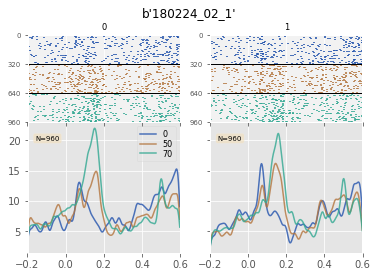

b'180224_05_1'


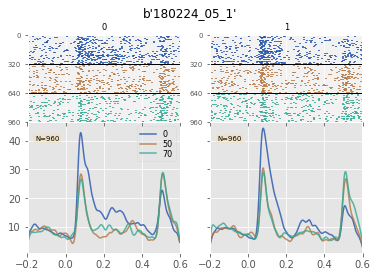

b'180224_07_1'


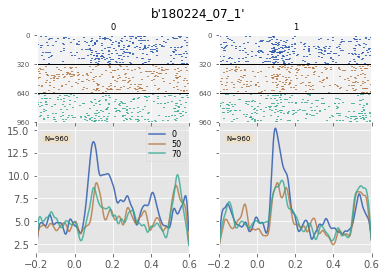

b'180224_09_1'


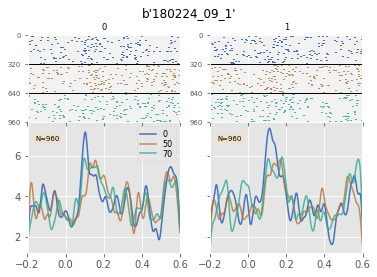

b'180224_09_2'


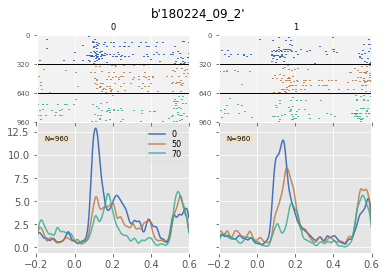

b'180224_10_1'


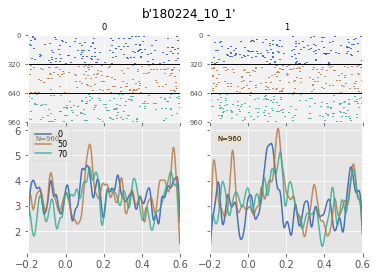

b'180224_10_2'


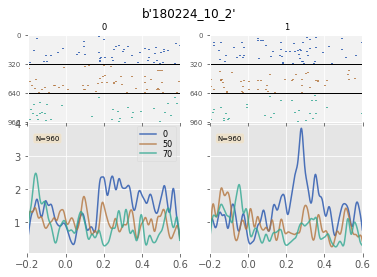

b'180317_05_1'


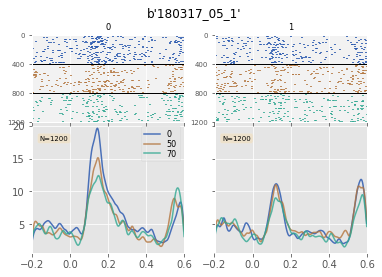

b'180317_06_1'


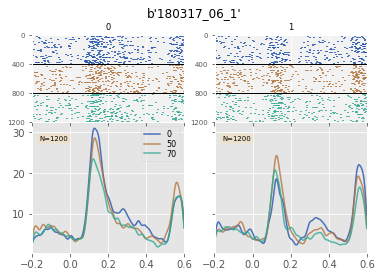

b'180317_07_1'


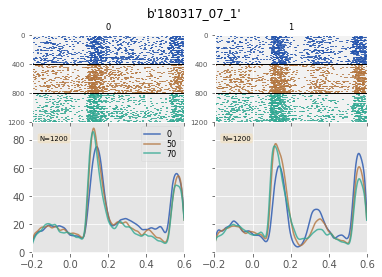

b'180317_08_1'


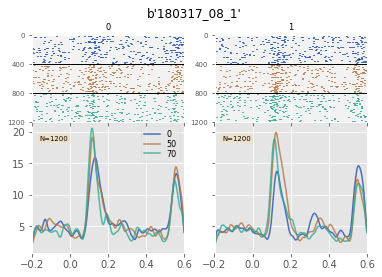

b'180317_09_1'


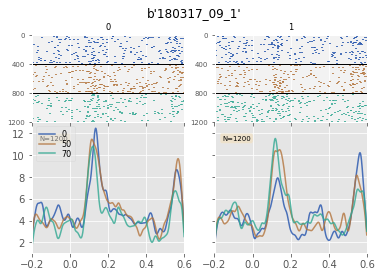

b'180317_11_1'


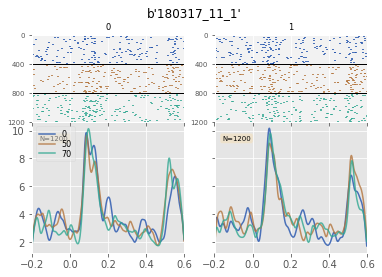

b'180317_12_1'


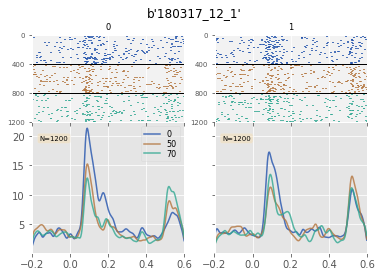

b'180317_13_1'


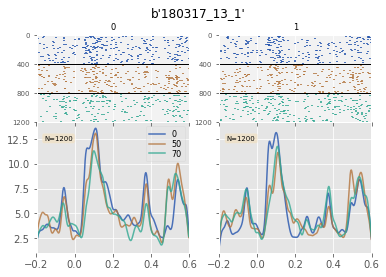

b'180317_14_1'


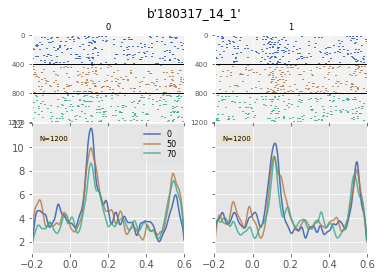

b'180317_15_1'


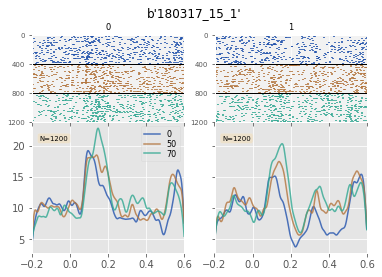

b'180317_16_1'


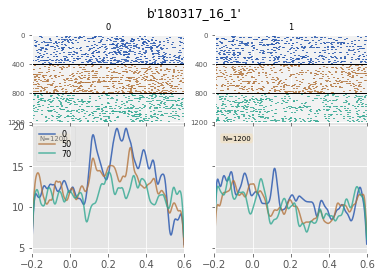

b'180325_05_1'


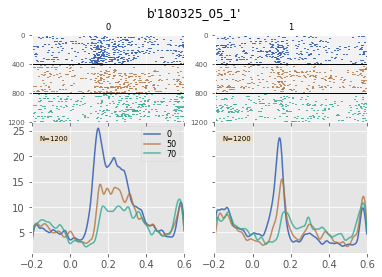

b'180325_06_1'


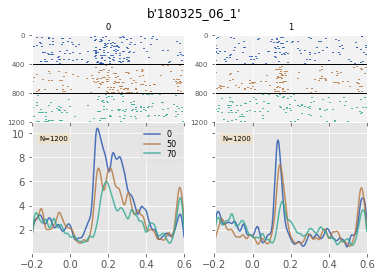

b'180325_07_1'


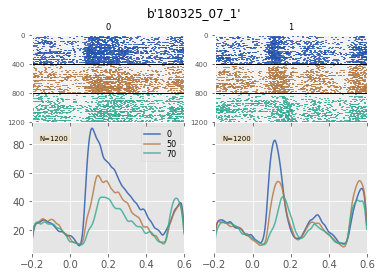

b'180325_08_1'


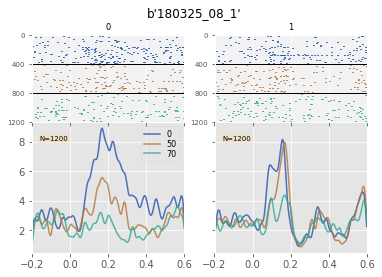

b'180325_09_1'


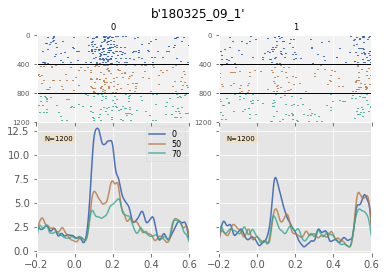

b'180325_09_2'


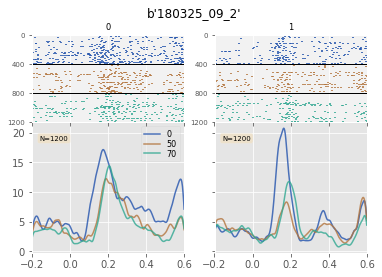

b'180325_10_1'


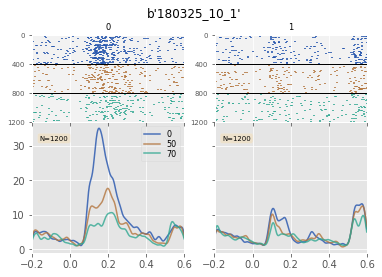

b'180407_04_1'


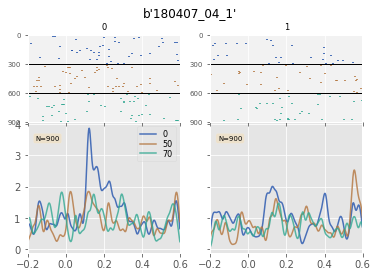

b'180407_04_3'


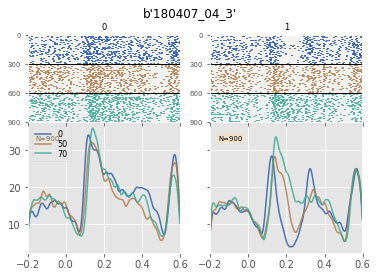

b'180407_16_2'


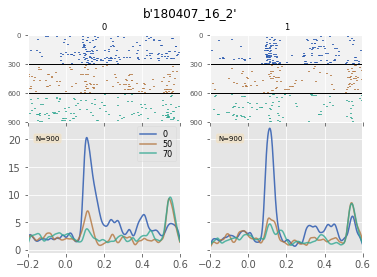

b'180411_04_2'


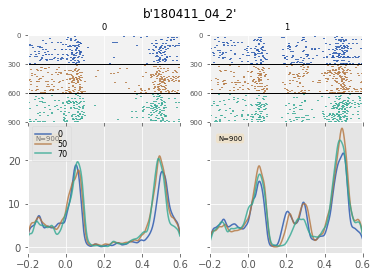

b'180411_06_1'


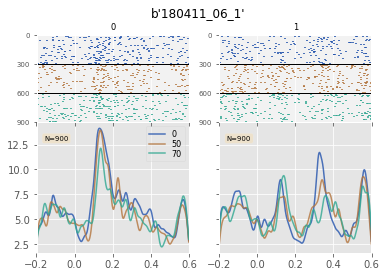

b'180411_07_1'


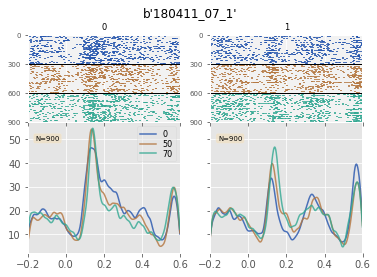

b'180411_08_2'


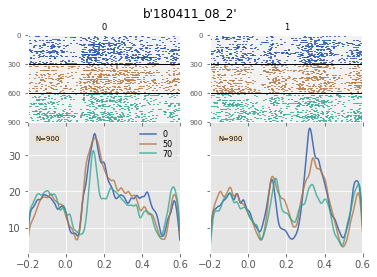

b'180411_09_1'


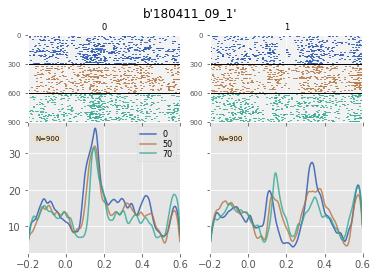

b'180411_10_1'


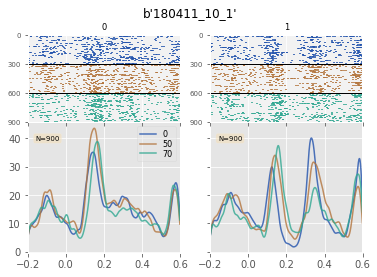

b'180411_15_1'


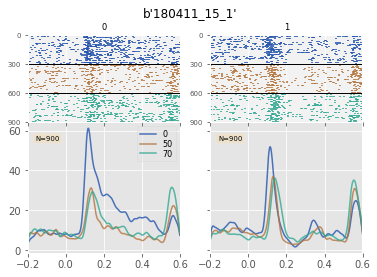

b'180411_16_2'


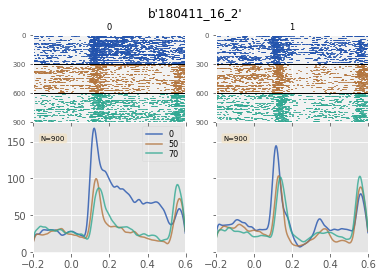

b'180413_01_1'


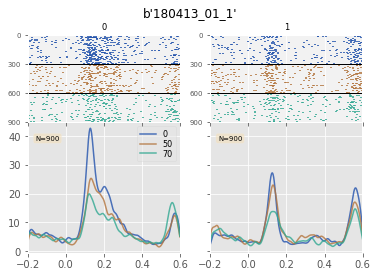

b'180413_01_2'


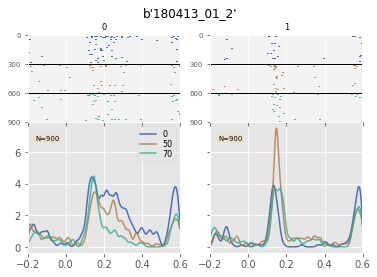

b'180413_02_1'


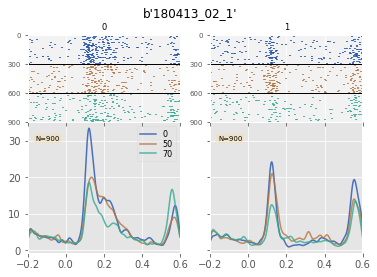

b'180413_04_1'


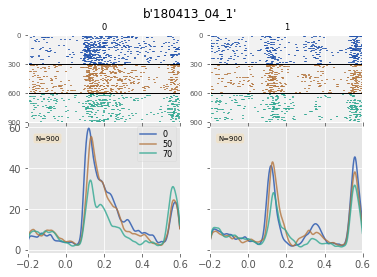

b'180413_05_2'


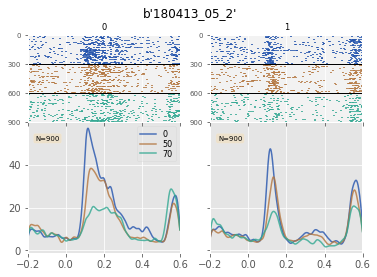

b'180413_06_1'


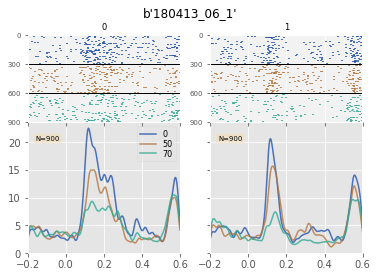

b'180413_06_2'


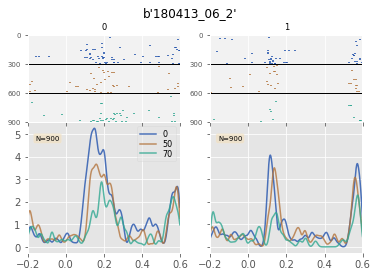

b'180413_07_1'


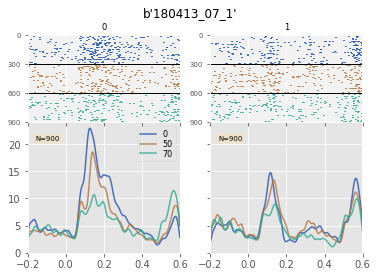

b'180413_07_3'


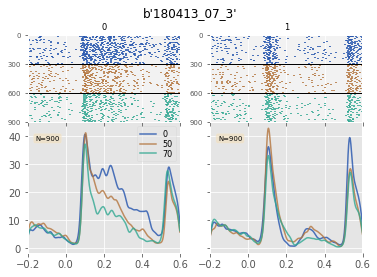

b'180413_08_1'


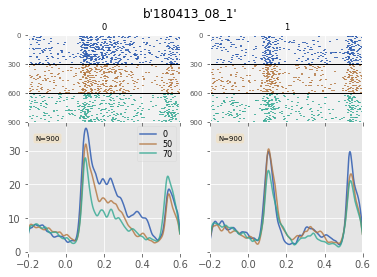

b'180413_10_1'


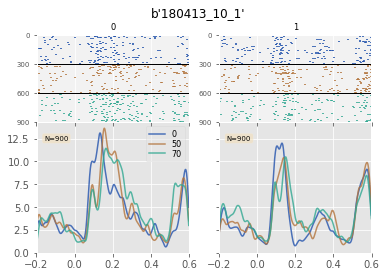

b'180413_10_2'


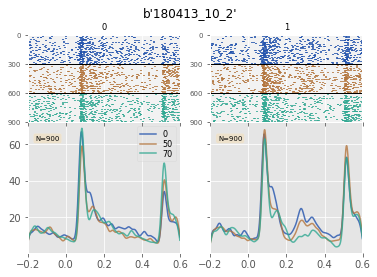

b'180413_11_1'


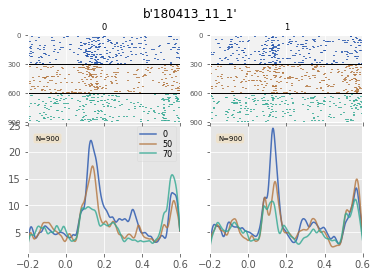

b'180418_02_1'


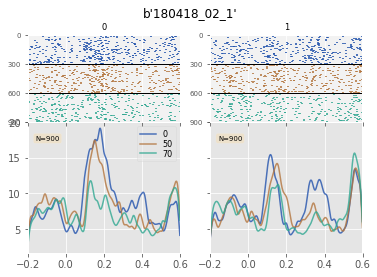

b'180418_04_1'


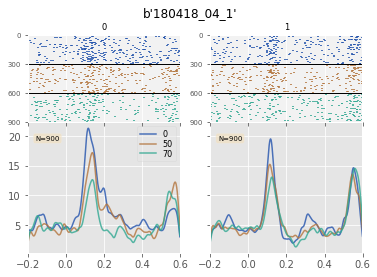

b'180418_05_1'


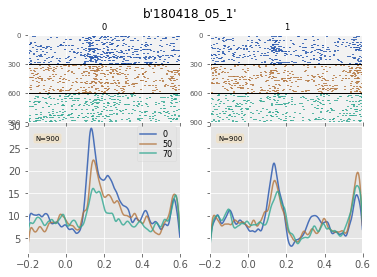

b'180418_06_1'


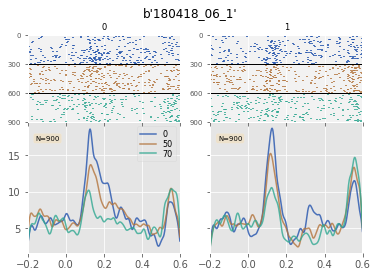

b'180418_07_1'


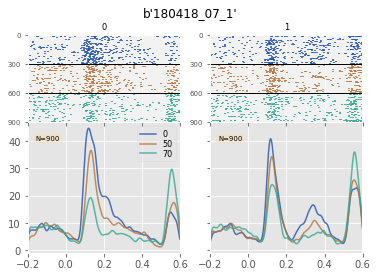

b'180418_08_1'


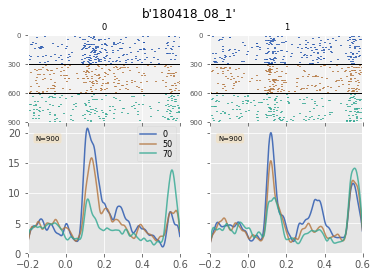

b'180418_10_1'


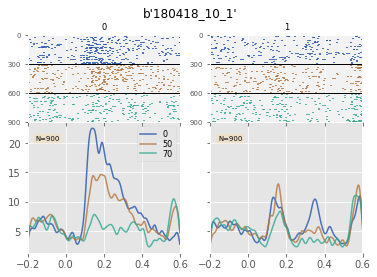

b'180418_11_2'


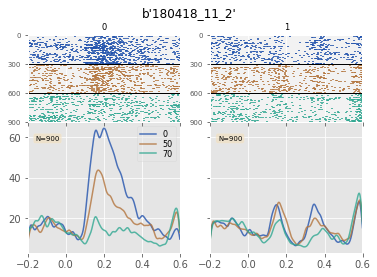

b'180418_15_1'


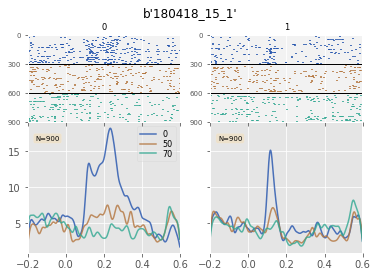

b'180418_16_2'


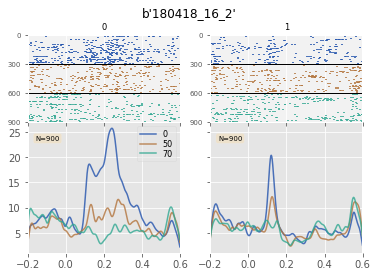

b'180420_01_1'


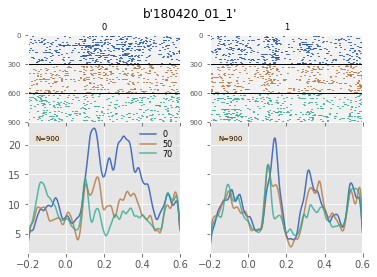

b'180420_02_1'


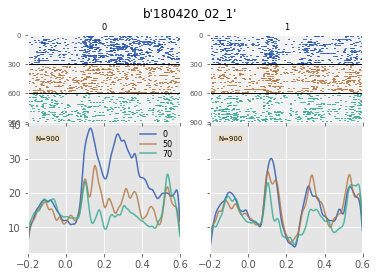

b'180420_02_2'


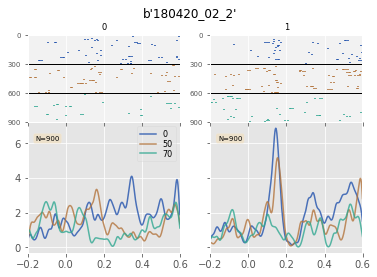

b'180420_03_1'


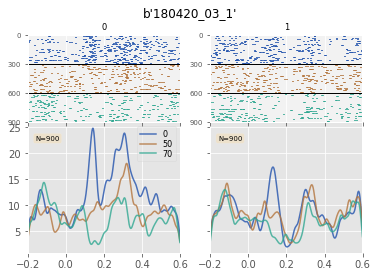

b'180420_03_2'


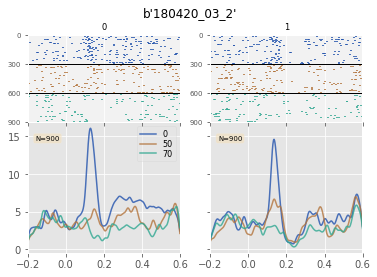

b'180420_04_1'


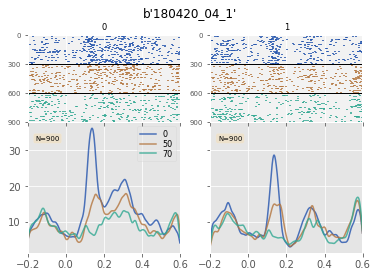

b'180420_04_2'


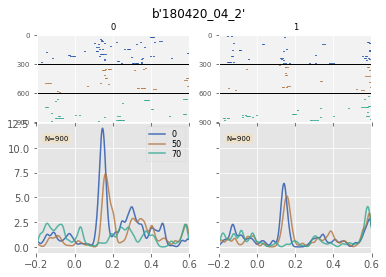

b'180420_05_2'


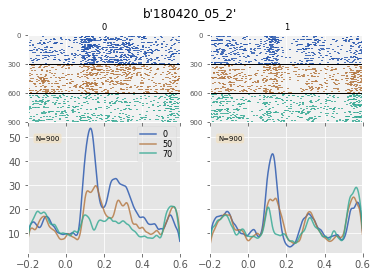

b'180420_06_2'


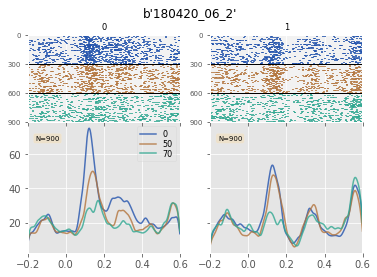

b'180420_07_1'


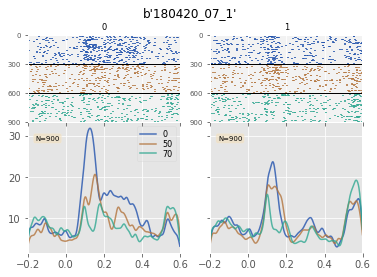

b'180420_07_3'


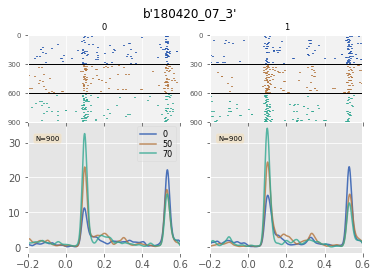

b'180420_08_1'


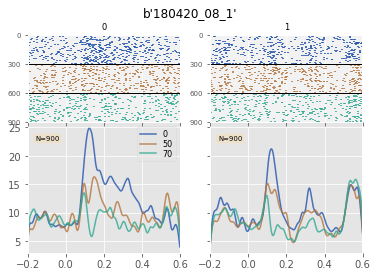

b'180420_09_1'


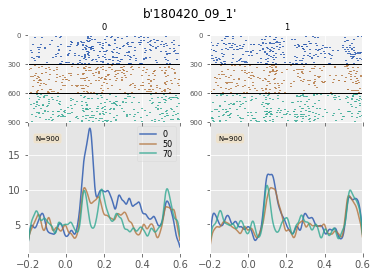

b'180420_09_2'


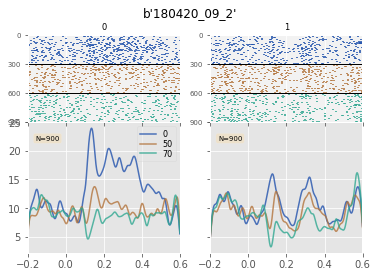

b'180420_10_2'


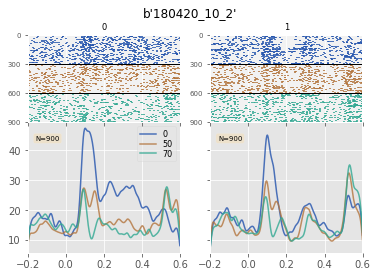

b'180420_11_2'


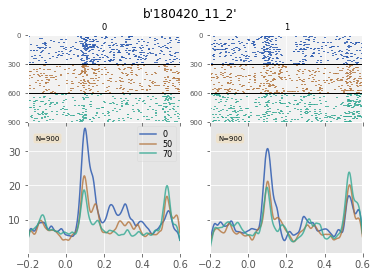

In [5]:
import df_ana

for data_neuro in list_data_neuro:
    
    data_neuro = data_neuro
    data_df = data_neuro['trial_info']

    grpby = 'stim_familiarized'
    df_group = df_ana.DfGroupby(data_df, groupby=grpby, tf_aggregate=False)
    for i_signal in range(len(data_neuro['signal_id'])):
        
        signal_name = str(data_neuro['signal_id'][i_signal])
        print(signal_name)
        
        date_cur, ch_cur, sortcode_cur = re.findall('(\d{6})_(\d*)_(\d*)', signal_name)[0]
        ch_cur = int(ch_cur)
        sortcode_cur = int(sortcode_cur)
        
        if int(ch_cur) >0:
        
            h_fig, h_axes = pnp.CreateSubplotFromGroupby(df_group['order'], tf_title=False)
            # plt.gcf().set_size_inches([10, 8])
            tf_legend = True
            for cdtn in df_group['idx']:
                plt.axes(h_axes[cdtn])
                pnp.PsthPlot(data_neuro['data'][:, :, i_signal], ts=data_neuro['ts'],
                             cdtn=data_df['mask_opacity_int'], limit=df_group['idx'][cdtn], sk_std=0.010,
                             tf_legend=tf_legend)
                tf_legend = False
                plt.title(cdtn, fontsize='small')
            plt.suptitle('{}'.format(signal_name))
            plt.show()
            plt.close('all')

(6, 813, 75) (6, 813) (0, 10)


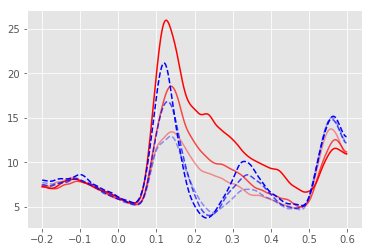

In [9]:
psth_all_srv_mask = np.concatenate(list_psth_srv_mask, axis=2)


psth_all_smooth = pna.SmoothTrace(psth_all_srv_mask, sk_std=0.010, ts=ts_srv_mask, axis=1)
psth_plot = np.mean(psth_all_smooth, axis=2)

print(psth_all_srv_mask.shape, psth_plot.shape, signal_full_srv_mask.shape)

list_color = ['r','r','r','b','b','b']
list_ls = ['-', '-', '-', '--', '--', '--']
list_alpha = [1.0, 0.7, 0.4, 1.0, 0.7, 0.4]

for i in range(6):
    plt.plot(ts_srv_mask, psth_plot[i, :], color=list_color[i], ls = list_ls[i], alpha = list_alpha[i])
plt.show()
plt.close('all')

161015 reading_dg
161015 reading_neural
161023 reading_dg
161023 reading_neural
161026 reading_dg
161026 reading_neural
161029 reading_dg
161029 reading_neural
161118 reading_dg
161118 reading_neural
161121 reading_dg
161121 reading_neural
161125 reading_dg
161125 reading_neural
161202 reading_dg
161202 reading_neural
161206 reading_dg
161206 reading_neural
161222 reading_dg
161222 reading_neural
161228 reading_dg
161228 reading_neural
170103 reading_dg
170103 reading_neural
170106 reading_dg
170106 reading_neural
170113 reading_dg
170113 reading_neural
170117 reading_dg
170117 reading_neural
170214 reading_dg
170214 reading_neural
170221 reading_dg
170221 reading_neural


/shared/homes/sguan/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/shared/homes/sguan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/shared/homes/sguan/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


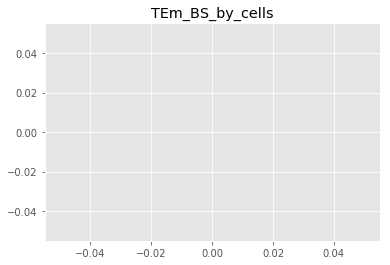

In [11]:
list_date = hf.keys()
list_psth = []
list_signal = []
for date in list_date:
    data_neuro = lsit_
    data_neural['trial_info'] = data_df
    data_neural = signal_align.neuro_sort(data_df, grpby=['stim_familiarized','mask_opacity_int'], neuro=data_neural)
    psth = pna.GroupAve(data_neural)
    list_psth.append(psth)
    list_signal.append(data_neural['signal_id'])

ts = data_neural['ts']
signal_all = np.concatenate(list_signal)
psth_all = np.concatenate(list_psth, axis=2)
signal_full = pd.DataFrame({'signal_id': signal_all}).merge(signal_info_detail, how='inner', on=['signal_id'], copy=False)

psth_all_smooth = pna.SmoothTrace(psth_all, sk_std=0.005, ts=ts, axis=1)
psth_plot = np.mean(psth_all_smooth[:, :, (signal_full['wf_type']=='BS') * (signal_full['area']=='TEm')], axis=2)

list_color = ['r','r','r','b','b','b']
list_ls = ['-', '-', '-', '--', '--', '--']
list_alpha = [1.0, 0.7, 0.4, 1.0, 0.7, 0.4]

for i in range(6):
    plt.plot(ts, psth_plot[i, :], color=list_color[i], ls = list_ls[i], alpha = list_alpha[i])

psth_all_smooth = pna.SmoothTrace(psth_all, sk_std=0.020, ts=ts, axis=1)
psth_plot = psth_all_smooth[2][:, (signal_full['wf_type']=='BS') * (signal_full['area']=='TEm')]
list_color = pnp.gen_distinct_colors(psth_plot.shape[1])
for i in range(psth_plot.shape[1]):
    plt.plot(ts, psth_plot[:,i], color=list_color[i])
plt.title('TEm_BS_by_cells')
#plt.savefig('./temp_figs/TEm_BS_by_cells')
plt.show()
plt.close('all')



/shared/homes/sguan/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


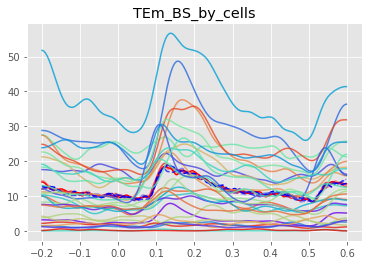

In [35]:
ts = data_neural['ts']
signal_all = np.concatenate(list_signal)
psth_all = np.concatenate(list_psth, axis=2)
signal_full = pd.DataFrame({'signal_id': signal_all.astype('str')}).merge(signal_info_detail, how='inner', on=['signal_id'], copy=False)

psth_all_smooth = pna.SmoothTrace(psth_all, sk_std=0.005, ts=ts, axis=1)
psth_plot = np.mean(psth_all_smooth[:, :, (signal_full['wf_type']=='BS') * (signal_full['area']=='TEm')], axis=2)

list_color = ['r','r','r','b','b','b']
list_ls = ['-', '-', '-', '--', '--', '--']
list_alpha = [1.0, 0.7, 0.4, 1.0, 0.7, 0.4]

for i in range(6):
    plt.plot(ts, psth_plot[i, :], color=list_color[i], ls = list_ls[i], alpha = list_alpha[i])

psth_all_smooth = pna.SmoothTrace(psth_all, sk_std=0.020, ts=ts, axis=1)
psth_plot = psth_all_smooth[2][:, (signal_full['wf_type']=='BS') * (signal_full['area']=='TEm')]
list_color = pnp.gen_distinct_colors(psth_plot.shape[1])
for i in range(psth_plot.shape[1]):
    plt.plot(ts, psth_plot[:,i], color=list_color[i])
plt.title('TEm_BS_by_cells')
#plt.savefig('./temp_figs/TEm_BS_by_cells')
plt.show()
plt.close('all')

In [13]:
signal_full_srv_mask

,signal_id,date,signal_name,channel_index,sort_code,num_spk,wf_type,wf,area,depth
0,161015_01_1,161015,Chan1 Code1,1,1,33798,,"[-6.39568156657333e-07, -7.072243874972628e-07...",V4,NaN
1,161015_01_2,161015,Chan1 Code2,1,2,5871,,"[-9.904590569931315e-07, -9.577245236869203e-0...",V4,NaN
2,161015_02_2,161015,Chan2 Code2,2,2,42438,,"[-8.543582339370914e-07, -9.284999578085262e-0...",V4,NaN
3,161015_05_1,161015,Chan5 Code1,5,1,17848,,"[-3.027197863048059e-06, -3.1636709536542185e-...",V4,NaN
4,161015_06_1,161015,Chan6 Code1,6,1,8471,,"[6.326794732558483e-07, 9.595951269147918e-07,...",V4,NaN
5,161015_08_1,161015,Chan8 Code1,8,1,11336,,"[-1.4659386806670227e-06, -1.6407351495217881e...",V4,NaN
6,161015_09_1,161015,Chan9 Code1,9,1,5433,,"[-4.260783725840156e-07, -3.5916562524107576e-...",V4,NaN
7,161015_11_1,161015,Chan11 Code1,11,1,13193,,"[-6.495460525002272e-07, -6.061660542400205e-0...",V4,NaN
8,161015_11_2,161015,Chan11 Code2,11,2,6659,,"[-9.535533536109142e-07, -1.057936174220231e-0...",V4,NaN
9,161015_12_1,161015,Chan12 Code1,12,1,17453,,"[-1.230189809575677e-06, -1.430703036930936e-0...",V4,NaN


In [21]:
data_neural_srv_mask

{'data': array([[[   0.        ,    0.        ,    0.        , ...,
             0.        ,    0.        ,    0.        ],
         [   0.        ,    0.        ,    0.        , ...,
             0.        ,    0.        ,    0.        ],
         [   0.        ,    0.        ,    0.        , ...,
             0.        ,    0.        ,    0.        ],
         ...,
         [   0.        ,    0.        ,    0.        , ...,
             0.        ,    0.        ,    0.        ],
         [   0.        ,    0.        ,    0.        , ...,
             0.        ,    0.        ,    0.        ],
         [   0.        ,    0.        ,    0.        , ...,
             0.        ,    0.        ,    0.        ]],
 
        [[   0.        ,    0.        ,    0.        , ...,
             0.        ,    0.        ,    0.        ],
         [   0.        ,    0.        ,    0.        , ...,
             0.        ,    0.        ,    0.        ],
         [   0.        ,    0.        ,    0.  

In [68]:
import importlib; importlib.reload(pna)

<module 'PyNeuroAna' from '/shared/homes/sguan/Coding_Projects/PyNeuroSG/PyNeuroAna.py'>

In [20]:
data_neuro['grpby']

['stim_familiarized', 'mask_opacity_int']

In [38]:
re.findall('(\d{6})_(\d*)_(\d*)', str(signal_name))[0]

('170221', '42', '2')